In [1]:
%load_ext autoreload

In [2]:
%autoreload 2
import pandas as pd
import numpy as np
%aimport AD_comparison_tools
%aimport AD_predictor_tools
import protfasta
import matplotlib.pyplot as plt
import seaborn as sns
import metapredict as meta


sns.set_theme(rc={'figure.figsize':(6,4), 'figure.dpi' : 300})
sns.set_style("white")

Loading in all predictors:

In [9]:
adhunter = pd.read_csv("../output/merged_ADHunter_Lambert_TF_predictions.csv", index_col = 0)
tada = pd.read_csv("../output/merged_TADA_Lambert_TF_predictions_0.4.csv", index_col = 0)
adpred = pd.read_csv("../output/predictions/adpred_LambertTF_predictions.csv", index_col = 0)
mechanistic = pd.read_csv("../output/predictions/LambertTFs_s_001_lcc_VP16_lch_006_ucc_-08_uch_CITED2_lcs1_inf_lcs2_000_lcs1_inf_ucs2_inf_comp_WFL_tl_039_ws_001_ps1_Charge_ps2_AllHydros", index_col = 0)
paddle = pd.read_csv("../data/Sanborn_HumanTF_Predictions_BothStrengths_Formatted",index_col=0)

In [10]:
adhunter

,uniprotID,Start,End,GeneName,ProteinRegionSeq
0,Q96QS3,393,436,sp|Q96QS3|ARX_HUMAN,HPPGLPFPGPLSATHPLSPYLDASPFPPHHPALDSAWTAAAAA
1,P31270,0,47,sp|P31270|HXA11_HUMAN,MDFDERGPCSSNMYLPSCTYYVSGPDFSSLPSFLPQTPSSRPMTYSY
2,P31270,110,159,sp|P31270|HXA11_HUMAN,SANVYHHPTPAVSSNFYSTVGRNGVLPQAFDQFFETAYGTPENLASSDY
3,P50221,56,99,sp|P50221|MEOX1_HUMAN,AAYPDFSASCLAATPHSLPQEEHIFTEQHPAFPQSPNWHFPVS
4,P57073,245,324,sp|P57073|SOX8_HUMAN,LEGRRPVDSGRQNIDFSNVDISELSSEVMGTMDAFDVHEFDQYLPL...
...,...,...,...,...,...
1664,P17098,14,72,sp|P17098|ZNF8_HUMAN,GPPAARLQEPVTFRDVAVDFTQEEWGQLDPTQRILYRDVMLETFGH...
1665,Q9UJW7,11,73,sp|Q9UJW7|ZN229_HUMAN,ALHSQASAISQDREEKIMSQEPLSFKDVAVVFTEEELELLDSTQRQ...
1666,Q9UJW7,111,176,sp|Q9UJW7|ZN229_HUMAN,VAGELPGSQDCRVNLQGKDFQFSEDAAPHQGWEGASTPCFPIENSL...
1667,Q9UJW7,187,256,sp|Q9UJW7|ZN229_HUMAN,WAKAFVNQLGDVQERCKNLDTEDTVYKCNWDDDSFCWISCHVDHRF...


In [11]:
tada

,uniprotID,Start,End,GeneName,ProteinRegionSeq
0,P31270,1,41,sp|P31270|HXA11_HUMAN,MDFDERGPCSSNMYLPSCTYYVSGPDFSSLPSFLPQTPSSR
1,P31270,108,170,sp|P31270|HXA11_HUMAN,AKSSANVYHHPTPAVSSNFYSTVGRNGVLPQAFDQFFETAYGTPEN...
2,P50221,58,98,sp|P50221|MEOX1_HUMAN,AYPDFSASCLAATPHSLPQEEHIFTEQHPAFPQSPNWHFPV
3,P57073,242,318,sp|P57073|SOX8_HUMAN,PELKLEGRRPVDSGRQNIDFSNVDISELSSEVMGTMDAFDVHEFDQ...
4,P57073,370,409,sp|P57073|SOX8_HUMAN,AAPAGPFAGSQGDYGDLQASSYYGAYPGYAPGLYQYPCFH
...,...,...,...,...,...
2391,P17098,4,88,sp|P17098|ZNF8_HUMAN,EDEGVAGVMSVGPPAARLQEPVTFRDVAVDFTQEEWGQLDPTQRIL...
2392,Q9UJW7,12,113,sp|Q9UJW7|ZN229_HUMAN,ALHSQASAISQDREEKIMSQEPLSFKDVAVVFTEEELELLDSTQRQ...
2393,Q9UJW7,116,182,sp|Q9UJW7|ZN229_HUMAN,LPGSQDCRVNLQGKDFQFSEDAAPHQGWEGASTPCFPIENSLDSLQ...
2394,Q9UJW7,184,247,sp|Q9UJW7|ZN229_HUMAN,IQGSWAKAFVNQLGDVQERCKNLDTEDTVYKCNWDDDSFCWISCHV...


In [12]:
adpred

,GeneName,ProteinRegionSeq,Start,End,uniprotID,Unnamed: 6
0,sp|Q96QS3|ARX_HUMAN,DEEDEDEEEELLEDDEEE,232,249,Q96QS3,True
1,sp|P57073|SOX8_HUMAN,SEVMGTMDAFD,270,280,P57073,True
2,sp|O14628|ZN195_HUMAN,WKCLDLAQQNLYRDVM,17,32,O14628,True
3,sp|P50549|ETV1_HUMAN,ELFQDLSQLQETWLAEAQ,44,61,P50549,True
4,sp|Q14209|E2F2_HUMAN,LISFSPSLDQDDYLWGLEAGEGISDLFDSYDLGDLLIN,399,436,Q14209,True
...,...,...,...,...,...,...
716,sp|Q8NAP8|ZBT8B_HUMAN,LDIVTSDAFSIILDFLYSGKLD,67,88,Q8NAP8,True
717,sp|P48742|LHX1_HUMAN,GDYQSEYYGPG,279,289,P48742,True
718,sp|Q9UI36|DACH1_HUMAN,PFLFPDGLSSI,607,617,Q9UI36,True
719,sp|P17098|ZNF8_HUMAN,QLDPTQRILYRD,40,51,P17098,True


In [13]:
mechanistic

,GeneName,Start,End,Length,RegionType,ProteinRegionSeq
0,sp|Q8WXT5|FX4L4_HUMAN,26,75,49,Prediction,IDVLGEEEDEDEVEDEEEEARQQFLEQSLQPGLQVARWGGVALPREHIE
1,sp|Q96MU6|ZN778_HUMAN,18,83,65,Prediction,LHEEQTQAAGMVAGWLINCYQDAVTFDDVAVDFTQEEWTLLDPSQR...
2,sp|O43313|ATMIN_HUMAN,630,690,60,Prediction,NPGIDFDIEEFFSASNIQTQTEESELSTMTTEPVLESLDIETQTDF...
3,sp|O14978|ZN263_HUMAN,79,120,41,Prediction,ILELLVLEQFLTILPQEIQSRVQELHPESGEEAVTLVEDMQ
4,sp|O14978|ZN263_HUMAN,191,234,43,Prediction,SAPWLSLFPPEGNMEDKEMTGPQLPESLEDVAMYISQEEWGHQ
...,...,...,...,...,...,...
541,sp|P28698|MZF1_HUMAN,173,226,53,Prediction,MQESPLGLQVKEESEVTEDSDFLESGPLAATQESVPTLLPEEAQRC...
542,sp|Q53EQ6|TIGD5_HUMAN,500,550,50,Prediction,EEAAEHSRVLSDLTHLAALAYKCLAPEEVAEWLHLDDDGGPPEGCR...
543,sp|Q07869|PPARA_HUMAN,1,58,57,Prediction,VDTESPLCPLSPLEAGDLESPLSEEFLQEMGNIQEISQSIGEDSSG...
544,sp|Q9H0D2|ZN541_HUMAN,46,107,61,Prediction,AGLSGLDPDPSLPTPDMSSEVLEDNLDTLSLYSGKDSDSVKLLEEY...


In [14]:
paddle

,Unnamed: 0,uniprotID,Start,End,max predicted Z score,Activity_Zscore_mean,protein,description,AAseq,ProteinRegionSeq,Length
0,0,Q6P9G9,155,235,6.80,6.42,ZNF449,Zinc finger protein 449,MAVALGCAIQASLNQGSVFQEYDTDCEVFRQRFRQFQYREAAGPHE...,EAPVAEAWIPQAGPPELNYGATGECQNFLDPGYPLPKLDMNFSLEN...,81
1,1,Q04206,418,502,8.22,7.55,RELA,Transcription factor p65,MDELFPLIFPAEPAQASGPYVEIIEQPKQRGMRFRYKCEGRSAGSI...,QAVAPPAPKPTQAGEGTLSEALLQLQFDDEDLGALLGNSTDPAVFT...,85
2,2,Q9Y2G1,0,62,7.64,6.98,MYRF,Myelin regulatory factor,MEVVDETEALQRFFEGHDINGALEPSNIDTSILEEYISKEDASDLC...,MEVVDETEALQRFFEGHDINGALEPSNIDTSILEEYISKEDASDLC...,63
3,3,P43354,13,77,6.98,6.59,NR4A2,Nuclear receptor subfamily 4 group A member 2,MPCVQAQYGSSPQGASPASQSYSYHSSGEYSSDFLTPEFVKFSMDL...,GASPASQSYSYHSSGEYSSDFLTPEFVKFSMDLTNTEITATTSLPS...,65
4,4,Q9ULD5,278,338,6.52,6.24,ZNF777,Zinc finger protein 777,MENQRSSPLSFPSVPQEETLRQAPAGLPRETLFQSRVLPPKEIPSL...,EVPKVPVTFDDVAVHFSEQEWGNLSEWQKELYKNVMRGNYESLVSM...,61
...,...,...,...,...,...,...,...,...,...,...,...
597,597,Q03701,943,1030,6.40,4.49,CEBPZ,CCAAT/enhancer-binding protein zeta,MAAVKEPLEFHAKRPWRPEEAVEDPDEEDEDNTSEAENGFSLEEVL...,KKSKRKGTDDFDFAGSFQGPRKKKRNLNDSSLFVSAEEFGHLLDEN...,88
598,598,Q2M1K9,51,136,4.81,4.00,ZNF423,Zinc finger protein 423,MHKKRVEEGEASDFSLAWDSSVTAAGGLEGEPECDQKTSRALEDRN...,EERNEDDEDMEDESIYTCDHCQQDFESLADLTDHRAHRCPGDGDDD...,86
599,599,Q96LX8,0,107,5.62,3.93,ZNF597,Zinc finger protein 597,MASMPPTPEAQGPILFEDLAVYFSQEECVTLHPAQRSLSKDGTKES...,MASMPPTPEAQGPILFEDLAVYFSQEECVTLHPAQRSLSKDGTKES...,108
600,600,Q9Y2D1,15,104,5.56,4.40,ATF5,Cyclic AMP-dependent transcription factor ATF-5,MSLLATLGLELDRALLPASGLGWLVDYGKLPPAPAPLAPYEVLGGA...,LPASGLGWLVDYGKLPPAPAPLAPYEVLGGALEGGLPVGGEPLAGD...,90


Formatting consistent:

uniprotID | Start | End | predictor_name

In [15]:
for df in [adhunter, tada, adpred, mechanistic]:
    df["uniprotID"] = df["GeneName"].str.split("|").str[1] 
    
adhunter = adhunter[["uniprotID", "Start", "End"]]
adhunter["region_type"] = "adhunter"

tada = tada[["uniprotID", "Start", "End"]]
tada["region_type"] = "tada"

adpred = adpred[["uniprotID", "Start", "End"]]
adpred["region_type"] = "adpred"

mechanistic = mechanistic[["uniprotID", "Start", "End"]]
mechanistic["region_type"] = "mechanistic"

paddle = paddle[["uniprotID", "Start", "End"]]
paddle["region_type"] = "paddle"
paddle

,uniprotID,Start,End,region_type
0,Q6P9G9,155,235,paddle
1,Q04206,418,502,paddle
2,Q9Y2G1,0,62,paddle
3,P43354,13,77,paddle
4,Q9ULD5,278,338,paddle
...,...,...,...,...
597,Q03701,943,1030,paddle
598,Q2M1K9,51,136,paddle
599,Q96LX8,0,107,paddle
600,Q9Y2D1,15,104,paddle


In [18]:
known_ADs = pd.read_csv("../../SFARI/output/known_ADs_considering_isoforms_and_canonical.csv")
known_ADs = known_ADs[["uniprotID", "Start", "End"]]
known_ADs["region_type"] = "known_AD"
known_ADs

,uniprotID,Start,End,region_type
0,Q6UWZ7,121,200,known_AD
1,Q8IUX7,1088,1158,known_AD
2,Q8WYP5,1445,1698,known_AD
3,P35869,118,126,known_AD
4,P35869,266,268,known_AD
...,...,...,...,...
739,P17040,262,341,known_AD
740,P98168,572,699,known_AD
741,P98169,576,703,known_AD
742,Q2QGD7,579,688,known_AD


In [19]:
all_regions = pd.concat([adhunter, tada, adpred, mechanistic, paddle, known_ADs])
all_regions

,uniprotID,Start,End,region_type
0,Q96QS3,393,436,adhunter
1,P31270,0,47,adhunter
2,P31270,110,159,adhunter
3,P50221,56,99,adhunter
4,P57073,245,324,adhunter
...,...,...,...,...
739,P17040,262,341,known_AD
740,P98168,572,699,known_AD
741,P98169,576,703,known_AD
742,Q2QGD7,579,688,known_AD


Now loading in lambert TFs to compare to
will compare each 40 AA window to all preds

In [21]:
tiled_lambert = AD_predictor_tools.makeTilingDF("../data/lambert_TFs_10-21-24_with_DBD_coords.fasta", window_size = 40, window_spacing = 40)
tiled_lambert

Creating new Tiling DF at  ../data/TilingDFs/lambert_TFs_10-21-24_with_DBD_coords_size_40_space_40_AAs_W,F,Y,M,L,Q.csv
Window Size = 40  and Window spacing = 40
Number of Tiling Windows: 24540


,ProteinWindowSeq,GeneName,StartPosition,EndPosition,W,F,Y,M,L,Q,K,R,D,E,Charge
0,MEPEGRGSLFEDSDLLHAGNPKENDVTAVLLTPGSQELMI,sp|A0A087WUV0|ZN892_HUMAN Zinc finger protein ...,0,40,0,1,0,2,6,1,1,1,3,5,-6
1,RDMAEALTQWRQLNSPQGDVPEKPRNLVLLGLPISTPDVI,sp|A0A087WUV0|ZN892_HUMAN Zinc finger protein ...,40,80,1,0,0,1,6,3,1,3,3,2,-1
2,SQLEHEEELEREVSKAASQKHWETIPESKELTPEKDISEE,sp|A0A087WUV0|ZN892_HUMAN Zinc finger protein ...,80,120,1,0,0,0,3,2,4,1,1,12,-8
3,ESAPGVLIVRFSKESSSECEDSLESQQENHEKHLIQEAVT,sp|A0A087WUV0|ZN892_HUMAN Zinc finger protein ...,120,160,0,1,0,0,3,3,2,1,1,8,-6
4,EKSSRERSYQSDEFRRNCTQRSLLVQQQGERLHHCDSFKN,sp|A0A087WUV0|ZN892_HUMAN Zinc finger protein ...,160,200,0,2,1,0,3,5,2,6,2,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24535,EIAFEKPNLPSAADWSEFLSASTSEKVENEFAQLTLSDHE,sp|Q9Y6Y1|CMTA1_HUMAN Calmodulin-binding trans...,1480,1520,1,3,0,0,4,1,2,0,2,7,-7
24536,QRELYEAARLVQTAFRKYKGRPLREQQEVAAAVIQRCYRK,sp|Q9Y6Y1|CMTA1_HUMAN Calmodulin-binding trans...,1520,1560,0,1,3,0,3,5,3,7,0,4,6
24537,YKQYALYKKMTQAAILIQSKFRSYYEQKKFQQSRRAAVLI,sp|Q9Y6Y1|CMTA1_HUMAN Calmodulin-binding trans...,1560,1600,0,2,5,1,3,6,6,3,0,1,8
24538,QKYYRSYKKCGKRRQARRTAVIVQQKLRSSLLTKKQDQAA,sp|Q9Y6Y1|CMTA1_HUMAN Calmodulin-binding trans...,1600,1640,0,0,3,0,3,6,7,6,1,0,12


In [22]:
tiled_lambert["uniprotID"] = tiled_lambert["GeneName"].str.split("|").str[1]
tiled_lambert

,ProteinWindowSeq,GeneName,StartPosition,EndPosition,W,F,Y,M,L,Q,K,R,D,E,Charge,uniprotID
0,MEPEGRGSLFEDSDLLHAGNPKENDVTAVLLTPGSQELMI,sp|A0A087WUV0|ZN892_HUMAN Zinc finger protein ...,0,40,0,1,0,2,6,1,1,1,3,5,-6,A0A087WUV0
1,RDMAEALTQWRQLNSPQGDVPEKPRNLVLLGLPISTPDVI,sp|A0A087WUV0|ZN892_HUMAN Zinc finger protein ...,40,80,1,0,0,1,6,3,1,3,3,2,-1,A0A087WUV0
2,SQLEHEEELEREVSKAASQKHWETIPESKELTPEKDISEE,sp|A0A087WUV0|ZN892_HUMAN Zinc finger protein ...,80,120,1,0,0,0,3,2,4,1,1,12,-8,A0A087WUV0
3,ESAPGVLIVRFSKESSSECEDSLESQQENHEKHLIQEAVT,sp|A0A087WUV0|ZN892_HUMAN Zinc finger protein ...,120,160,0,1,0,0,3,3,2,1,1,8,-6,A0A087WUV0
4,EKSSRERSYQSDEFRRNCTQRSLLVQQQGERLHHCDSFKN,sp|A0A087WUV0|ZN892_HUMAN Zinc finger protein ...,160,200,0,2,1,0,3,5,2,6,2,4,2,A0A087WUV0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24535,EIAFEKPNLPSAADWSEFLSASTSEKVENEFAQLTLSDHE,sp|Q9Y6Y1|CMTA1_HUMAN Calmodulin-binding trans...,1480,1520,1,3,0,0,4,1,2,0,2,7,-7,Q9Y6Y1
24536,QRELYEAARLVQTAFRKYKGRPLREQQEVAAAVIQRCYRK,sp|Q9Y6Y1|CMTA1_HUMAN Calmodulin-binding trans...,1520,1560,0,1,3,0,3,5,3,7,0,4,6,Q9Y6Y1
24537,YKQYALYKKMTQAAILIQSKFRSYYEQKKFQQSRRAAVLI,sp|Q9Y6Y1|CMTA1_HUMAN Calmodulin-binding trans...,1560,1600,0,2,5,1,3,6,6,3,0,1,8,Q9Y6Y1
24538,QKYYRSYKKCGKRRQARRTAVIVQQKLRSSLLTKKQDQAA,sp|Q9Y6Y1|CMTA1_HUMAN Calmodulin-binding trans...,1600,1640,0,0,3,0,3,6,7,6,1,0,12,Q9Y6Y1


In [23]:
joined = pd.merge(tiled_lambert, all_regions, on = "uniprotID")
joined

,ProteinWindowSeq,GeneName,StartPosition,EndPosition,W,F,Y,M,L,Q,K,R,D,E,Charge,uniprotID,Start,End,region_type
0,MENEKENLFCEPHKRGLMKTPLKESTTANIVLAEIQPDFG,sp|A0AVK6|E2F8_HUMAN Transcription factor E2F8...,0,40,0,2,0,2,4,1,4,1,1,6,-2,A0AVK6,210,253,adhunter
1,MENEKENLFCEPHKRGLMKTPLKESTTANIVLAEIQPDFG,sp|A0AVK6|E2F8_HUMAN Transcription factor E2F8...,0,40,0,2,0,2,4,1,4,1,1,6,-2,A0AVK6,207,255,tada
2,PLTTPTKPKEGSQGEPWTPTANLKMLISAVSPEIRNRDQK,sp|A0AVK6|E2F8_HUMAN Transcription factor E2F8...,40,80,1,0,0,1,3,2,4,2,1,3,2,A0AVK6,210,253,adhunter
3,PLTTPTKPKEGSQGEPWTPTANLKMLISAVSPEIRNRDQK,sp|A0AVK6|E2F8_HUMAN Transcription factor E2F8...,40,80,1,0,0,1,3,2,4,2,1,3,2,A0AVK6,207,255,tada
4,RGLFDNRSGLPEAKDCIHEHLSGDEFEKSQPSRKEKSLGL,sp|A0AVK6|E2F8_HUMAN Transcription factor E2F8...,80,120,0,2,0,0,5,1,4,3,3,5,-1,A0AVK6,210,253,adhunter
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131244,RKIMRFLRRCRHSPLVDHRLYKRSERIEKGQGT,sp|Q9Y6Y1|CMTA1_HUMAN Calmodulin-binding trans...,1640,1673,0,1,1,1,3,1,3,8,1,2,8,Q9Y6Y1,1131,1145,adpred
131245,RKIMRFLRRCRHSPLVDHRLYKRSERIEKGQGT,sp|Q9Y6Y1|CMTA1_HUMAN Calmodulin-binding trans...,1640,1673,0,1,1,1,3,1,3,8,1,2,8,Q9Y6Y1,724,816,paddle
131246,RKIMRFLRRCRHSPLVDHRLYKRSERIEKGQGT,sp|Q9Y6Y1|CMTA1_HUMAN Calmodulin-binding trans...,1640,1673,0,1,1,1,3,1,3,8,1,2,8,Q9Y6Y1,1453,1531,paddle
131247,RKIMRFLRRCRHSPLVDHRLYKRSERIEKGQGT,sp|Q9Y6Y1|CMTA1_HUMAN Calmodulin-binding trans...,1640,1673,0,1,1,1,3,1,3,8,1,2,8,Q9Y6Y1,702,841,known_AD


In [24]:
def return_overlap(i, df = joined):
    return max(0, min(df["End"].iloc[i], df["EndPosition"].iloc[i]) - max(df["Start"].iloc[i], df["StartPosition"].iloc[i]))

overlaps = []
for i in joined.index:
    overlaps.append(return_overlap(i))

In [25]:
joined["overlap"] = overlaps
joined

,ProteinWindowSeq,GeneName,StartPosition,EndPosition,W,F,Y,M,L,Q,K,R,D,E,Charge,uniprotID,Start,End,region_type,overlap
0,MENEKENLFCEPHKRGLMKTPLKESTTANIVLAEIQPDFG,sp|A0AVK6|E2F8_HUMAN Transcription factor E2F8...,0,40,0,2,0,2,4,1,4,1,1,6,-2,A0AVK6,210,253,adhunter,0
1,MENEKENLFCEPHKRGLMKTPLKESTTANIVLAEIQPDFG,sp|A0AVK6|E2F8_HUMAN Transcription factor E2F8...,0,40,0,2,0,2,4,1,4,1,1,6,-2,A0AVK6,207,255,tada,0
2,PLTTPTKPKEGSQGEPWTPTANLKMLISAVSPEIRNRDQK,sp|A0AVK6|E2F8_HUMAN Transcription factor E2F8...,40,80,1,0,0,1,3,2,4,2,1,3,2,A0AVK6,210,253,adhunter,0
3,PLTTPTKPKEGSQGEPWTPTANLKMLISAVSPEIRNRDQK,sp|A0AVK6|E2F8_HUMAN Transcription factor E2F8...,40,80,1,0,0,1,3,2,4,2,1,3,2,A0AVK6,207,255,tada,0
4,RGLFDNRSGLPEAKDCIHEHLSGDEFEKSQPSRKEKSLGL,sp|A0AVK6|E2F8_HUMAN Transcription factor E2F8...,80,120,0,2,0,0,5,1,4,3,3,5,-1,A0AVK6,210,253,adhunter,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131244,RKIMRFLRRCRHSPLVDHRLYKRSERIEKGQGT,sp|Q9Y6Y1|CMTA1_HUMAN Calmodulin-binding trans...,1640,1673,0,1,1,1,3,1,3,8,1,2,8,Q9Y6Y1,1131,1145,adpred,0
131245,RKIMRFLRRCRHSPLVDHRLYKRSERIEKGQGT,sp|Q9Y6Y1|CMTA1_HUMAN Calmodulin-binding trans...,1640,1673,0,1,1,1,3,1,3,8,1,2,8,Q9Y6Y1,724,816,paddle,0
131246,RKIMRFLRRCRHSPLVDHRLYKRSERIEKGQGT,sp|Q9Y6Y1|CMTA1_HUMAN Calmodulin-binding trans...,1640,1673,0,1,1,1,3,1,3,8,1,2,8,Q9Y6Y1,1453,1531,paddle,0
131247,RKIMRFLRRCRHSPLVDHRLYKRSERIEKGQGT,sp|Q9Y6Y1|CMTA1_HUMAN Calmodulin-binding trans...,1640,1673,0,1,1,1,3,1,3,8,1,2,8,Q9Y6Y1,702,841,known_AD,0


In [26]:
summary_table = pd.pivot_table(joined, 
               values='overlap', 
               index=['GeneName', 'StartPosition', 'EndPosition', 'ProteinWindowSeq'],
              columns = 'region_type', aggfunc="sum").reset_index()
summary_table = summary_table.fillna(0)
summary_table

region_type,GeneName,StartPosition,EndPosition,ProteinWindowSeq,adhunter,adpred,known_AD,mechanistic,paddle,tada
0,sp|A0AVK6|E2F8_HUMAN Transcription factor E2F8...,0,40,MENEKENLFCEPHKRGLMKTPLKESTTANIVLAEIQPDFG,0.0,0.0,0.0,0.0,0.0,0.0
1,sp|A0AVK6|E2F8_HUMAN Transcription factor E2F8...,40,80,PLTTPTKPKEGSQGEPWTPTANLKMLISAVSPEIRNRDQK,0.0,0.0,0.0,0.0,0.0,0.0
2,sp|A0AVK6|E2F8_HUMAN Transcription factor E2F8...,80,120,RGLFDNRSGLPEAKDCIHEHLSGDEFEKSQPSRKEKSLGL,0.0,0.0,0.0,0.0,0.0,0.0
3,sp|A0AVK6|E2F8_HUMAN Transcription factor E2F8...,120,160,LCHKFLARYPNYPNPAVNNDICLDEVAEELNVERRRIYDI,0.0,0.0,0.0,0.0,0.0,0.0
4,sp|A0AVK6|E2F8_HUMAN Transcription factor E2F8...,160,200,VNVLESLHMVSRLAKNRYTWHGRHNLNKTLGTLKSIGEEN,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
21861,sp|Q9Y6Y1|CMTA1_HUMAN Calmodulin-binding trans...,1480,1520,EIAFEKPNLPSAADWSEFLSASTSEKVENEFAQLTLSDHE,0.0,0.0,0.0,0.0,40.0,40.0
21862,sp|Q9Y6Y1|CMTA1_HUMAN Calmodulin-binding trans...,1520,1560,QRELYEAARLVQTAFRKYKGRPLREQQEVAAAVIQRCYRK,0.0,0.0,0.0,0.0,11.0,11.0
21863,sp|Q9Y6Y1|CMTA1_HUMAN Calmodulin-binding trans...,1560,1600,YKQYALYKKMTQAAILIQSKFRSYYEQKKFQQSRRAAVLI,0.0,0.0,0.0,0.0,0.0,0.0
21864,sp|Q9Y6Y1|CMTA1_HUMAN Calmodulin-binding trans...,1600,1640,QKYYRSYKKCGKRRQARRTAVIVQQKLRSSLLTKKQDQAA,0.0,0.0,0.0,0.0,0.0,0.0


In [27]:
pred_cols = ["adhunter", "adpred", "mechanistic", "paddle", "tada"]
summary_table["num_predictors"] = 5 - (summary_table[pred_cols] == 0).astype(int).sum(axis=1)
summary_table

region_type,GeneName,StartPosition,EndPosition,ProteinWindowSeq,adhunter,adpred,known_AD,mechanistic,paddle,tada,num_predictors
0,sp|A0AVK6|E2F8_HUMAN Transcription factor E2F8...,0,40,MENEKENLFCEPHKRGLMKTPLKESTTANIVLAEIQPDFG,0.0,0.0,0.0,0.0,0.0,0.0,0
1,sp|A0AVK6|E2F8_HUMAN Transcription factor E2F8...,40,80,PLTTPTKPKEGSQGEPWTPTANLKMLISAVSPEIRNRDQK,0.0,0.0,0.0,0.0,0.0,0.0,0
2,sp|A0AVK6|E2F8_HUMAN Transcription factor E2F8...,80,120,RGLFDNRSGLPEAKDCIHEHLSGDEFEKSQPSRKEKSLGL,0.0,0.0,0.0,0.0,0.0,0.0,0
3,sp|A0AVK6|E2F8_HUMAN Transcription factor E2F8...,120,160,LCHKFLARYPNYPNPAVNNDICLDEVAEELNVERRRIYDI,0.0,0.0,0.0,0.0,0.0,0.0,0
4,sp|A0AVK6|E2F8_HUMAN Transcription factor E2F8...,160,200,VNVLESLHMVSRLAKNRYTWHGRHNLNKTLGTLKSIGEEN,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...
21861,sp|Q9Y6Y1|CMTA1_HUMAN Calmodulin-binding trans...,1480,1520,EIAFEKPNLPSAADWSEFLSASTSEKVENEFAQLTLSDHE,0.0,0.0,0.0,0.0,40.0,40.0,2
21862,sp|Q9Y6Y1|CMTA1_HUMAN Calmodulin-binding trans...,1520,1560,QRELYEAARLVQTAFRKYKGRPLREQQEVAAAVIQRCYRK,0.0,0.0,0.0,0.0,11.0,11.0,2
21863,sp|Q9Y6Y1|CMTA1_HUMAN Calmodulin-binding trans...,1560,1600,YKQYALYKKMTQAAILIQSKFRSYYEQKKFQQSRRAAVLI,0.0,0.0,0.0,0.0,0.0,0.0,0
21864,sp|Q9Y6Y1|CMTA1_HUMAN Calmodulin-binding trans...,1600,1640,QKYYRSYKKCGKRRQARRTAVIVQQKLRSSLLTKKQDQAA,0.0,0.0,0.0,0.0,0.0,0.0,0


In [30]:
summary_table.to_csv("../output/human_TF_windows_for_SCU.csv")

In [28]:
# dont overlap known
not_known = summary_table[summary_table["known_AD"] == 0]
not_known

region_type,GeneName,StartPosition,EndPosition,ProteinWindowSeq,adhunter,adpred,known_AD,mechanistic,paddle,tada,num_predictors
0,sp|A0AVK6|E2F8_HUMAN Transcription factor E2F8...,0,40,MENEKENLFCEPHKRGLMKTPLKESTTANIVLAEIQPDFG,0.0,0.0,0.0,0.0,0.0,0.0,0
1,sp|A0AVK6|E2F8_HUMAN Transcription factor E2F8...,40,80,PLTTPTKPKEGSQGEPWTPTANLKMLISAVSPEIRNRDQK,0.0,0.0,0.0,0.0,0.0,0.0,0
2,sp|A0AVK6|E2F8_HUMAN Transcription factor E2F8...,80,120,RGLFDNRSGLPEAKDCIHEHLSGDEFEKSQPSRKEKSLGL,0.0,0.0,0.0,0.0,0.0,0.0,0
3,sp|A0AVK6|E2F8_HUMAN Transcription factor E2F8...,120,160,LCHKFLARYPNYPNPAVNNDICLDEVAEELNVERRRIYDI,0.0,0.0,0.0,0.0,0.0,0.0,0
4,sp|A0AVK6|E2F8_HUMAN Transcription factor E2F8...,160,200,VNVLESLHMVSRLAKNRYTWHGRHNLNKTLGTLKSIGEEN,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...
21861,sp|Q9Y6Y1|CMTA1_HUMAN Calmodulin-binding trans...,1480,1520,EIAFEKPNLPSAADWSEFLSASTSEKVENEFAQLTLSDHE,0.0,0.0,0.0,0.0,40.0,40.0,2
21862,sp|Q9Y6Y1|CMTA1_HUMAN Calmodulin-binding trans...,1520,1560,QRELYEAARLVQTAFRKYKGRPLREQQEVAAAVIQRCYRK,0.0,0.0,0.0,0.0,11.0,11.0,2
21863,sp|Q9Y6Y1|CMTA1_HUMAN Calmodulin-binding trans...,1560,1600,YKQYALYKKMTQAAILIQSKFRSYYEQKKFQQSRRAAVLI,0.0,0.0,0.0,0.0,0.0,0.0,0
21864,sp|Q9Y6Y1|CMTA1_HUMAN Calmodulin-binding trans...,1600,1640,QKYYRSYKKCGKRRQARRTAVIVQQKLRSSLLTKKQDQAA,0.0,0.0,0.0,0.0,0.0,0.0,0


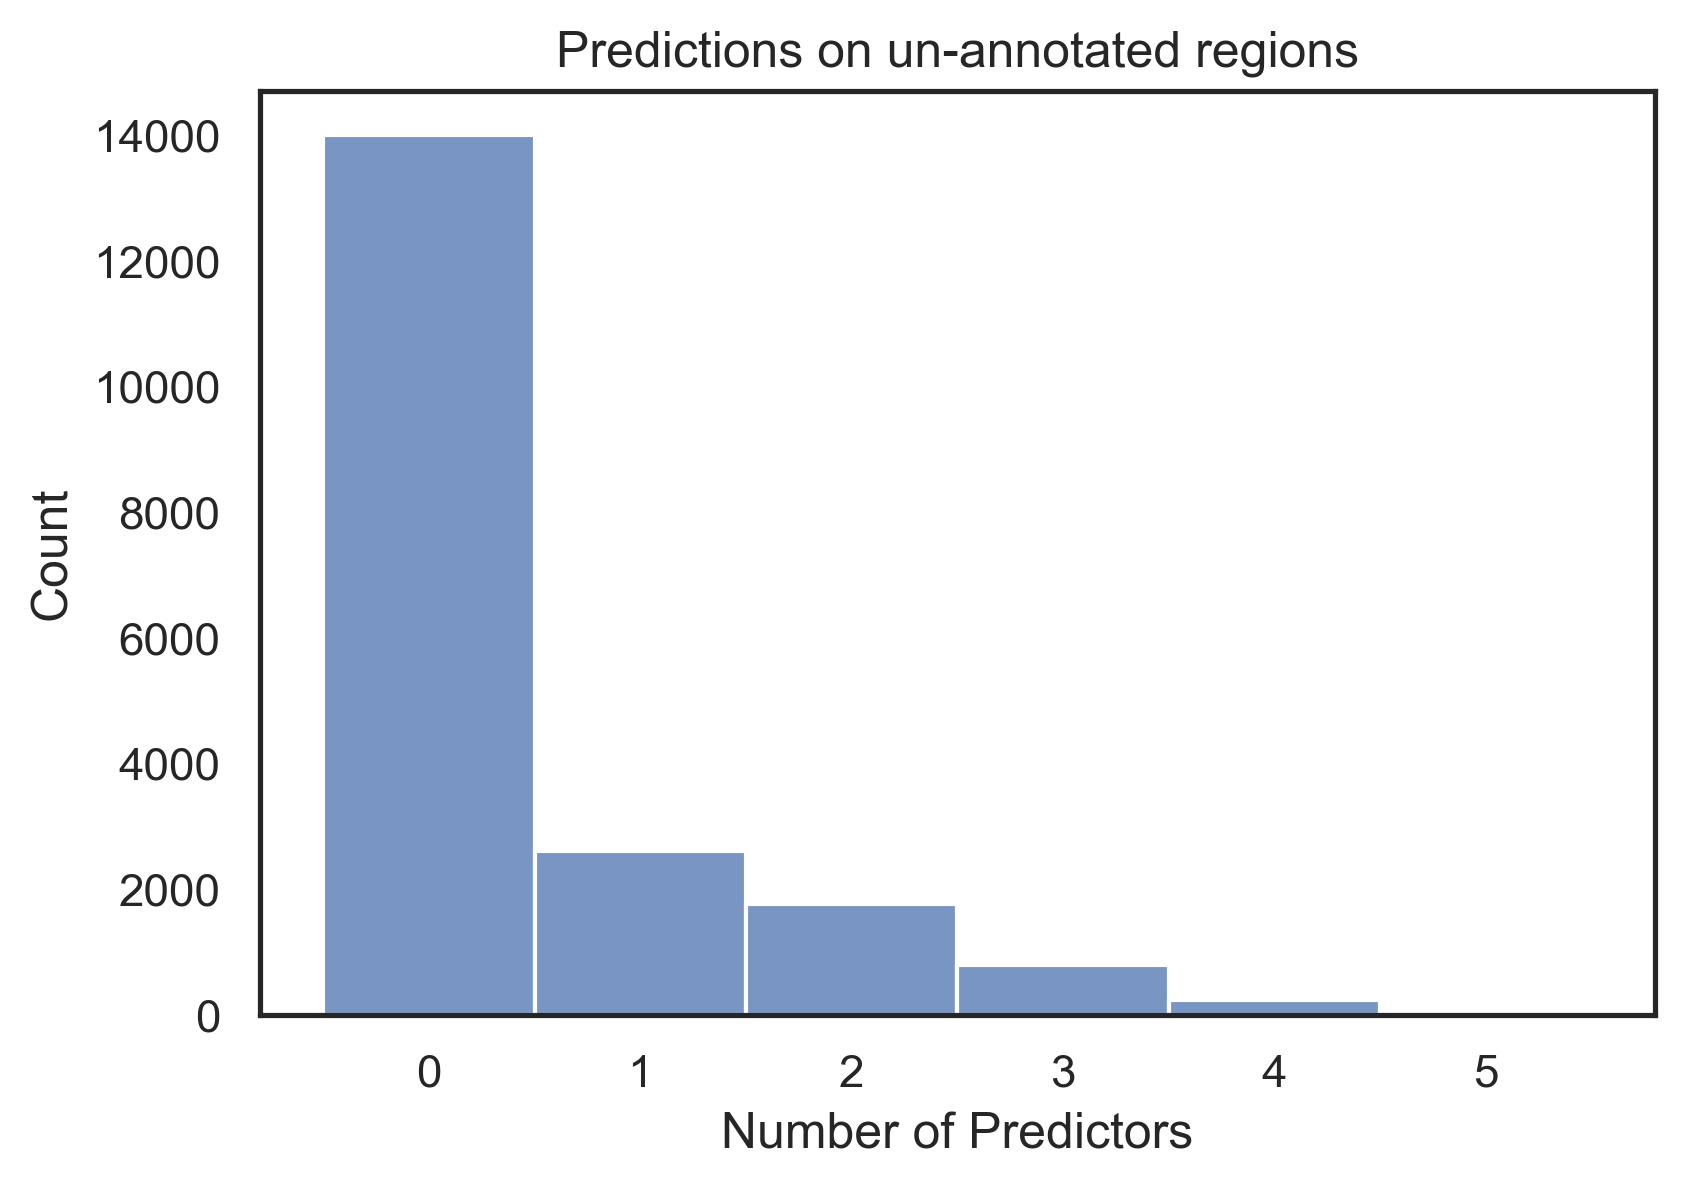

In [29]:
bin_edges = np.arange(min(not_known["num_predictors"]) - 0.5, max(not_known["num_predictors"]) + 1.5, 1)
sns.histplot(not_known["num_predictors"], bins=bin_edges)
plt.xticks(np.arange(min(not_known["num_predictors"]), max(not_known["num_predictors"]) + 1, 1))
plt.xlabel("Number of Predictors")
plt.title("Predictions on un-annotated regions")
plt.show()

In [21]:
not_known_major_pred = not_known[not_known["num_predictors"] >= 3]
not_known_major_pred

region_type,GeneName,StartPosition,EndPosition,ProteinWindowSeq,adhunter,adpred,known_AD,mechanistic,paddle,tada,num_predictors
27,sp|A1YPR0|ZBT7C_HUMAN,200,240,SDTPRDFPDSFQAGSPGHLGVIRDFSIESLLRENLYPKAN,16.0,0.0,0.0,0.0,18.0,16.0,3
28,sp|A1YPR0|ZBT7C_HUMAN,240,280,IPDRRPSLSPFAPDFFPHLWPGDFGAFAQLPEQPMDSGPL,40.0,18.0,0.0,0.0,40.0,40.0,4
29,sp|A1YPR0|ZBT7C_HUMAN,280,320,DLVIKNRKIKEEEKEELPPPPPPPFPNDFFKDMFPDLPGG,40.0,0.0,0.0,0.0,63.0,40.0,3
30,sp|A1YPR0|ZBT7C_HUMAN,320,360,PLGPIKAENDYGAYLNFLSATHLGGLFPPWPLVEERKLKP,34.0,0.0,0.0,0.0,21.0,25.0,3
39,sp|A2RRD8|ZN320_HUMAN,40,80,YRNLVSLDISSKCMMNTLSSTGQGNTEVIHTGTLQRQASY,21.0,0.0,0.0,0.0,28.0,15.0,3
...,...,...,...,...,...,...,...,...,...,...,...
20310,sp|Q9Y692|GMEB1_HUMAN,200,240,VVQTPTSADGSITQIAISEESMEEAGLEWNSALTAAVTMA,0.0,0.0,0.0,18.0,24.0,19.0,3
20311,sp|Q9Y692|GMEB1_HUMAN,240,280,TEEGVKKDSEEISEDTLMFWKGIADVGLMEEVVCNIQKEI,31.0,16.0,0.0,40.0,35.0,40.0,5
20312,sp|Q9Y692|GMEB1_HUMAN,280,320,EELLRGVQQRLIQAPFQVTDAAVLNNVAHTFGLMDTVKKV,9.0,0.0,0.0,6.0,27.0,4.0,4
20372,sp|Q9Y6R6|Z780B_HUMAN,0,40,MVHGSVTFRDVAIDFSQEEWECLQPDQRTLYRDVMLENYS,36.0,14.0,0.0,0.0,0.0,39.0,3


In [22]:
len(not_known_major_pred["GeneName"].unique())

424

In [23]:
not_known[not_known["num_predictors"] >= 4]

region_type,GeneName,StartPosition,EndPosition,ProteinWindowSeq,adhunter,adpred,known_AD,mechanistic,paddle,tada,num_predictors
28,sp|A1YPR0|ZBT7C_HUMAN,240,280,IPDRRPSLSPFAPDFFPHLWPGDFGAFAQLPEQPMDSGPL,40.0,18.0,0.0,0.0,40.0,40.0,4
96,sp|A6NFI3|ZN316_HUMAN,120,160,QASRAPATPRDEDLEEEEEEEEDEDEDDLLTAGCQELVTF,18.0,15.0,0.0,19.0,0.0,29.0,4
97,sp|A6NFI3|ZN316_HUMAN,160,200,EDVAVYFSLEEWERLEADQRGLYQEVMQENYGILVSLGYP,39.0,16.0,0.0,40.0,0.0,40.0,4
98,sp|A6NFI3|ZN316_HUMAN,200,240,IPKPDLIFRLEQGEEPWVPDSPRPEEGDIVTGVYTGAWFW,20.0,14.0,0.0,40.0,0.0,40.0,4
99,sp|A6NFI3|ZN316_HUMAN,240,280,TDDIEDHEEEDDEDFLAEVAEEENEPPGLWSAAYGVGDVP,37.0,13.0,0.0,6.0,0.0,34.0,4
...,...,...,...,...,...,...,...,...,...,...,...
20214,sp|Q9Y4E5|ZN451_HUMAN,680,720,AFLSHYEEHHSIDYVFVSEKTETSIKTEDDFPVIETSNQL,35.0,8.0,0.0,32.0,0.0,33.0,4
20218,sp|Q9Y4E5|ZN451_HUMAN,840,880,ERKLKQAINYSKSLDMEKGVENDLSYQNIEEEIVELPDLD,38.0,11.0,0.0,28.0,40.0,39.0,5
20219,sp|Q9Y4E5|ZN451_HUMAN,880,920,YLRTMTHIVFVDFDNWSNFFGHLPGHLNQGTFIWGFQGGN,40.0,12.0,0.0,21.0,6.0,36.0,5
20311,sp|Q9Y692|GMEB1_HUMAN,240,280,TEEGVKKDSEEISEDTLMFWKGIADVGLMEEVVCNIQKEI,31.0,16.0,0.0,40.0,35.0,40.0,5


In [24]:
len(not_known[not_known["num_predictors"] >= 4]["GeneName"].unique())

170

In [31]:
not_known_pred_all = not_known[not_known["num_predictors"] >= 5]
not_known_pred_all

region_type,GeneName,StartPosition,EndPosition,ProteinWindowSeq,adhunter,adpred,known_AD,mechanistic,paddle,tada,num_predictors
616,sp|O00409|FOXN3_HUMAN,40,80,LDFSLPDIRLEEGAMEDEELTNLNWLHESKNLLKSFGESV,11.0,11.0,0.0,38.0,33.0,38.0,5
730,sp|O14709|ZN197_HUMAN,240,280,LYWDVMLENYGNVTSLEWETMTENEEVTSKPSSSQRADSH,21.0,16.0,0.0,27.0,20.0,37.0,5
1701,sp|O60381|HBP1_HUMAN,200,240,LGWCNSWPSTVWHCFLKGTRLCFHKGSNKEWQDVEDFARA,39.0,10.0,0.0,11.0,30.0,19.0,5
1931,sp|O75461|E2F6_HUMAN,120,160,KNHIRWIGSDLSNFGAVPQQKKLQEELSDLSAMEDALDEL,29.0,6.0,0.0,24.0,39.0,29.0,5
1932,sp|O75461|E2F6_HUMAN,160,200,IKDCAQQLFELTDDKENERLAYVTYQDIHSIQAFHEQIVI,34.0,3.0,0.0,32.0,22.0,31.0,5
...,...,...,...,...,...,...,...,...,...,...,...
19783,sp|Q9Y222|DMTF1_HUMAN,320,360,CRSKWLNYLNWKQSGGTEWTKEDEINLILRIAELDVADEN,33.0,11.0,0.0,29.0,40.0,34.0,5
19784,sp|Q9Y222|DMTF1_HUMAN,360,400,DINWDLLAEGWSSVRSPQWLRSKWWTIKRQIANHKDVSFP,33.0,12.0,0.0,20.0,20.0,23.0,5
20218,sp|Q9Y4E5|ZN451_HUMAN,840,880,ERKLKQAINYSKSLDMEKGVENDLSYQNIEEEIVELPDLD,38.0,11.0,0.0,28.0,40.0,39.0,5
20219,sp|Q9Y4E5|ZN451_HUMAN,880,920,YLRTMTHIVFVDFDNWSNFFGHLPGHLNQGTFIWGFQGGN,40.0,12.0,0.0,21.0,6.0,36.0,5


In [32]:
not_known_pred_all.to_csv("../output/not_known_pred_all.csv")

In [26]:
len(not_known[not_known["num_predictors"] >= 5]["GeneName"].unique())

43

In [27]:
disorder_scores = [meta.percent_disorder(_) for _ in not_known_major_pred["ProteinWindowSeq"]]
not_known_major_pred["metapredict_percent_disorder"] = disorder_scores
not_known_major_pred

region_type,GeneName,StartPosition,EndPosition,ProteinWindowSeq,adhunter,adpred,known_AD,mechanistic,paddle,tada,num_predictors,metapredict_percent_disorder
27,sp|A1YPR0|ZBT7C_HUMAN,200,240,SDTPRDFPDSFQAGSPGHLGVIRDFSIESLLRENLYPKAN,16.0,0.0,0.0,0.0,18.0,16.0,3,50.0
28,sp|A1YPR0|ZBT7C_HUMAN,240,280,IPDRRPSLSPFAPDFFPHLWPGDFGAFAQLPEQPMDSGPL,40.0,18.0,0.0,0.0,40.0,40.0,4,100.0
29,sp|A1YPR0|ZBT7C_HUMAN,280,320,DLVIKNRKIKEEEKEELPPPPPPPFPNDFFKDMFPDLPGG,40.0,0.0,0.0,0.0,63.0,40.0,3,100.0
30,sp|A1YPR0|ZBT7C_HUMAN,320,360,PLGPIKAENDYGAYLNFLSATHLGGLFPPWPLVEERKLKP,34.0,0.0,0.0,0.0,21.0,25.0,3,22.5
39,sp|A2RRD8|ZN320_HUMAN,40,80,YRNLVSLDISSKCMMNTLSSTGQGNTEVIHTGTLQRQASY,21.0,0.0,0.0,0.0,28.0,15.0,3,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...
20310,sp|Q9Y692|GMEB1_HUMAN,200,240,VVQTPTSADGSITQIAISEESMEEAGLEWNSALTAAVTMA,0.0,0.0,0.0,18.0,24.0,19.0,3,30.0
20311,sp|Q9Y692|GMEB1_HUMAN,240,280,TEEGVKKDSEEISEDTLMFWKGIADVGLMEEVVCNIQKEI,31.0,16.0,0.0,40.0,35.0,40.0,5,27.5
20312,sp|Q9Y692|GMEB1_HUMAN,280,320,EELLRGVQQRLIQAPFQVTDAAVLNNVAHTFGLMDTVKKV,9.0,0.0,0.0,6.0,27.0,4.0,4,5.0
20372,sp|Q9Y6R6|Z780B_HUMAN,0,40,MVHGSVTFRDVAIDFSQEEWECLQPDQRTLYRDVMLENYS,36.0,14.0,0.0,0.0,0.0,39.0,3,15.0


<Axes: >

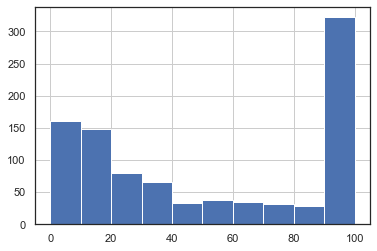

In [28]:
not_known_major_pred["metapredict_percent_disorder"].hist()

In [29]:
unannot_major_pred_no_disord = not_known_major_pred[not_known_major_pred["metapredict_percent_disorder"] == 0]
unannot_major_pred_no_disord

region_type,GeneName,StartPosition,EndPosition,ProteinWindowSeq,adhunter,adpred,known_AD,mechanistic,paddle,tada,num_predictors,metapredict_percent_disorder
3820,sp|P17031|ZNF26_HUMAN,40,80,DVILENYHNLISVGYHGTKPDLIFKLEQGEDPWIINAKIS,24.0,1.0,0.0,0.0,0.0,33.0,3,0.0
4988,sp|P40763|STAT3_HUMAN,0,40,MAQWNQLQQLDTRYLEQLHQLYSDSFPMELRQFLAPWIES,40.0,21.0,0.0,0.0,0.0,39.0,3,0.0
6868,sp|Q05516|ZBT16_HUMAN,80,120,QQILEYAYTATLQAKAEDLDDLLYAAEILEIEYLEEQCLK,40.0,26.0,0.0,40.0,39.0,40.0,5,0.0
7184,sp|Q12830|BPTF_HUMAN,520,560,EEMREEIHRHMDITEDLTNKARGSNKSFLAAANEEILESI,23.0,4.0,0.0,20.0,0.0,20.0,4,0.0
9272,sp|Q3ZCX4|ZN568_HUMAN,120,160,VWEVDEQIKKQQETLVRKVTSISKKILIKEKVIECKKVAK,6.0,0.0,0.0,16.0,0.0,17.0,3,0.0
11500,sp|Q7Z340|ZN551_HUMAN,40,80,EEWELLDESQRFLYCDVMLENFAHVTSLGYCHGMENEAIA,40.0,22.0,0.0,39.0,0.0,38.0,4,0.0
12281,sp|Q8IVW6|ARI3B_HUMAN,200,240,EISRDFAKLYELDGDPERKEFLDDLFVFMQKRGTPINRIP,40.0,13.0,0.0,0.0,33.0,31.0,4,0.0
14687,sp|Q96E29|MTEF3_HUMAN,400,417,EIAKASVQDFEKFLKTL,14.0,4.0,0.0,0.0,0.0,14.0,3,0.0
18527,sp|Q9P0W2|HM20B_HUMAN,200,240,AELRRLRKMNVAFEEQNAVLQRHTQSMSSARERLEQELAL,19.0,0.0,0.0,0.0,5.0,6.0,3,0.0


In [30]:
unannot_major_pred_no_disord[["GeneName", "StartPosition", "EndPosition", "ProteinWindowSeq", "num_predictors"]].sort_values(by = "num_predictors", ascending = False)

region_type,GeneName,StartPosition,EndPosition,ProteinWindowSeq,num_predictors
6868,sp|Q05516|ZBT16_HUMAN,80,120,QQILEYAYTATLQAKAEDLDDLLYAAEILEIEYLEEQCLK,5
7184,sp|Q12830|BPTF_HUMAN,520,560,EEMREEIHRHMDITEDLTNKARGSNKSFLAAANEEILESI,4
11500,sp|Q7Z340|ZN551_HUMAN,40,80,EEWELLDESQRFLYCDVMLENFAHVTSLGYCHGMENEAIA,4
12281,sp|Q8IVW6|ARI3B_HUMAN,200,240,EISRDFAKLYELDGDPERKEFLDDLFVFMQKRGTPINRIP,4
3820,sp|P17031|ZNF26_HUMAN,40,80,DVILENYHNLISVGYHGTKPDLIFKLEQGEDPWIINAKIS,3
4988,sp|P40763|STAT3_HUMAN,0,40,MAQWNQLQQLDTRYLEQLHQLYSDSFPMELRQFLAPWIES,3
9272,sp|Q3ZCX4|ZN568_HUMAN,120,160,VWEVDEQIKKQQETLVRKVTSISKKILIKEKVIECKKVAK,3
14687,sp|Q96E29|MTEF3_HUMAN,400,417,EIAKASVQDFEKFLKTL,3
18527,sp|Q9P0W2|HM20B_HUMAN,200,240,AELRRLRKMNVAFEEQNAVLQRHTQSMSSARERLEQELAL,3
